## Analysing World Cuisines

### Introduction  
A researcher named Yong-Yeol Ahn, scraped tens of thousands of food recipes (cuisines and ingredients) from three different websites and compiled them into a dataset. For more information on Yong-Yeol Ahn and his research, you can read his paper on [Flavor Network and the Principles of Food Pairing](http://yongyeol.com/papers/ahn-flavornet-2011.pdf?utm_email=Email&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_campaign=PLACEHOLDER&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork-20083987).  

In this EDA project, we will aim to analyse cuisines and their ingredients

## Outline
1) Data Cleaning  
2) Analysis of Cuisines  
3) Analysis of Ingredients  
4) Predicting Asian Cuisines from Ingredients

<hr style="border-top: 2px solid blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [3]:
# For Data Exploration and Visualization

import numpy as np

import pandas as pd
pd.set_option('max_rows', 50)   
pd.set_option('max_columns', 100)
pd.set_option('precision', 2)   # round to two decimal points
pd.set_option('float_format', '{:,.2f}'.format)   # suppress scientific notation globally

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

import seaborn as sns
sns.set_theme(style='darkgrid', context='notebook', palette='muted', font='sans-serif', font_scale=1, color_codes=True)

from IPython.core.interactiveshell import InteractiveShell   # print multiple outputs from single cell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [4]:
recipes = pd.read_csv('recipes.csv')
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,...,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [5]:
recipes.shape

(57691, 384)

Dataset consists of 57,691 recipes. Each row represents a recipe, and for each recipe, the corresponding cuisine is documented based on which of the 384 ingredients exist in the recipe.

In [6]:
recipes['country'].unique()

array(['Vietnamese', 'Indian', 'Spanish_Portuguese', 'Jewish', 'French',
       'Central_SouthAmerican', 'Cajun_Creole', 'Thai', 'Scandinavian',
       'Greek', 'American', 'African', 'MiddleEastern',
       'EasternEuropean_Russian', 'Italian', 'Irish', 'Mexican',
       'Chinese', 'German', 'Mediterranean', 'Japanese', 'Moroccan',
       'Southern_SoulFood', 'English_Scottish', 'Asian', 'Southwestern',
       'chinese', 'mexico', 'japanese', 'east_asian', 'asian', 'western',
       'korean', 'italian', 'Canada', 'Turkey', 'Caribbean', 'Bangladesh',
       'India', 'France', 'Italy', 'Israel', 'Korea', 'Iran',
       'Eastern-Europe', 'South-African', 'UK-and-Ireland', 'China',
       'Belgium', 'Germany', 'South-America', 'Spain', 'Netherlands',
       'Scandinavia', 'Philippines', 'Indonesia', 'East-African',
       'Vietnam', 'Thailand', 'Switzerland', 'West-African',
       'North-African', 'Pakistan', 'Portugal', 'Mexico', 'Lebanon',
       'Malaysia', 'Austria', 'Japan'], dtype=

We can also make the following observations:

1.  Cuisine column is incorrectly named as Country
2.  Cuisine names are not consistent, as not all of them start with an lowercase first letter.
3.  Some cuisines are duplicated as variation of the country name, such as Italian and Italy
4.  Ingredient columns have values Yes and No, which need to replaced with 1 and 0.

## Data Cleaning


In [7]:
# Rename column name 'country' to 'cuisine'
recipes.rename({'country':'cuisine'}, axis=1, inplace=True)

In [8]:
# Make all the cuisine names lowercase.
recipes["cuisine"] = recipes["cuisine"].str.lower()

In [9]:
# Make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "bangladesh", "cuisine"] = "bangladeshi"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "irish"

In [10]:
recipes['cuisine'].unique()

array(['vietnamese', 'indian', 'spanish_portuguese', 'jewish', 'french',
       'central_southamerican', 'cajun_creole', 'thai', 'scandinavian',
       'greek', 'american', 'african', 'middleeastern',
       'easterneuropean_russian', 'italian', 'irish', 'mexican',
       'chinese', 'german', 'mediterranean', 'japanese', 'moroccan',
       'southern_soulfood', 'english_scottish', 'asian', 'southwestern',
       'east_asian', 'western', 'korean', 'canadian', 'turkish',
       'caribbean', 'bangladeshi', 'israeli', 'iranian', 'eastern-europe',
       'south-african', 'uk-and-irish', 'belgian', 'south-america',
       'spanish', 'dutch', 'philippine', 'indonesian', 'east-african',
       'swiss', 'west-african', 'north-african', 'pakistani',
       'portuguese', 'lebanese', 'malaysian', 'austrian'], dtype=object)

In [11]:
# Convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

In [12]:
recipes.head(3)

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,...,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Analysis of Cuisines

#### No of cuisines in dataset

In [13]:
recipes['cuisine'].nunique()

53

53 unique cuisines in dataset

In [14]:
recipes['cuisine'].value_counts().head()

american    40150
italian      3250
mexican      2390
french       1264
asian        1193
Name: cuisine, dtype: int64

In [15]:
recipes['cuisine'].value_counts(normalize=True).head() * 100

american   69.59
italian     5.63
mexican     4.14
french      2.19
asian       2.07
Name: cuisine, dtype: float64

~70% of recipes in dataset are American, followed by Italina, Mexican, French and Asian, but their nos are less than 10%

#### Cuisines with Most Ingredients

In [16]:
# Total no of ingredients across all recipes

recipes['total'] = recipes.sum(axis=1)
recipes.head(3)

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,...,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,total
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
1,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [17]:
recipes[['cuisine','total']].sort_values('total', ascending=False).head()

,cuisine,total
549,spanish_portuguese,32
8235,easterneuropean_russian,32
40002,american,30
15982,canadian,29
2278,cajun_creole,29


There is 1 recipe each from cusines of Spain/Portugal, Russia, America, Canada with alomost 30 ingredients

#### Average No of Ingredients used in each cuisine

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:xlabel='cuisine'>

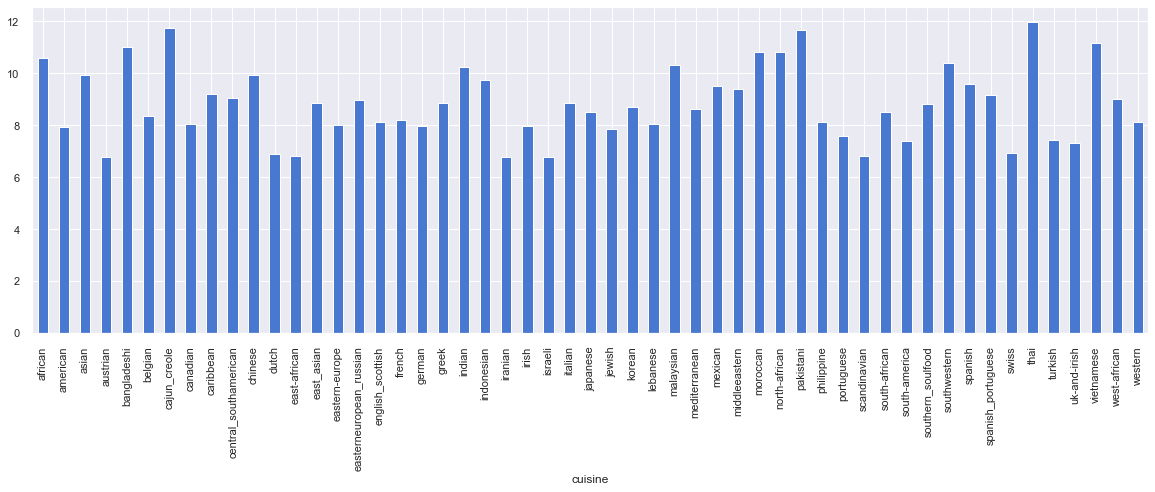

In [18]:
plt.figure(figsize=(20,6))
avg_ing = recipes.groupby('cuisine')['total'].mean()
avg_ing.plot.bar()

In [19]:
avg_ing.sort_values(ascending=False).head()

cuisine
thai           11.97
cajun_creole   11.75
pakistani      11.68
vietnamese     11.17
bangladeshi    11.00
Name: total, dtype: float64

Asian cuisines on average, use most ingredients

### Anaysis of Ingredients

#### Most used ingredients

In [20]:
most_ing = recipes.sum(axis=0).to_frame()

In [21]:
most_ing.drop(index=['cuisine','total']).sort_values(0, ascending=False).head()

,0
egg,21114
wheat,20896
butter,20814
onion,18205
garlic,17465


Most Used Ingredients across the world are - Egg, Wheat, Butter, Onion, Garlic

#### Most used ingredient in each cuisine

In [22]:
cuisine_list = recipes['cuisine'].unique()

In [23]:
top_ing = {}
for c in cuisine_list:
    df = pd.DataFrame()
    df = recipes[recipes['cuisine'] == c].copy()
    ing_count = df.sum(axis=0).to_frame()
    ing = ing_count.drop(index=['cuisine','total']).sort_values(0, ascending=False).head(1).index.to_list()
    top_ing[c] = ing

In [24]:
pd.DataFrame(top_ing)

,vietnamese,indian,spanish_portuguese,jewish,french,central_southamerican,cajun_creole,thai,scandinavian,greek,american,african,middleeastern,easterneuropean_russian,italian,irish,mexican,chinese,german,mediterranean,japanese,moroccan,southern_soulfood,english_scottish,asian,southwestern,east_asian,western,korean,canadian,turkish,caribbean,bangladeshi,israeli,iranian,eastern-europe,south-african,uk-and-irish,belgian,south-america,spanish,dutch,philippine,indonesian,east-african,swiss,west-african,north-african,pakistani,portuguese,lebanese,malaysian,austrian
0,fish,cumin,olive_oil,egg,butter,garlic,onion,garlic,butter,olive_oil,butter,onion,olive_oil,butter,olive_oil,butter,cayenne,soy_sauce,wheat,olive_oil,soy_sauce,olive_oil,butter,butter,soy_sauce,cayenne,garlic,egg,garlic,wheat,garlic,onion,cayenne,wheat,onion,wheat,onion,wheat,wheat,onion,onion,wheat,garlic,garlic,onion,butter,onion,onion,garlic,onion,lemon_juice,coconut,egg


#### Cuisines where ingredients are not in the list of top 5 ingredients

In [25]:
top_ing_df = pd.DataFrame(top_ing).T

In [26]:
top_ing_df = top_ing_df[~top_ing_df[0].isin(['egg', 'wheat', 'butter', 'onion', 'garlic'])]

In [27]:
top_ing_df

,0
vietnamese,fish
indian,cumin
spanish_portuguese,olive_oil
greek,olive_oil
middleeastern,olive_oil
italian,olive_oil
mexican,cayenne
chinese,soy_sauce
mediterranean,olive_oil
japanese,soy_sauce


### Predicting Asian Cuisines from Ingredients

#### Train-Test Split

In [92]:
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate,cross_val_score

from sklearn.metrics import\
classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [28]:
asian_cuisine = recipes[recipes['cuisine'].isin(['vietnamese','japanese','korean','thai','chinese','indian'])]

In [29]:
asian_cuisine['cuisine'].value_counts()

korean        799
indian        598
chinese       442
japanese      320
thai          289
vietnamese     95
Name: cuisine, dtype: int64

In [30]:
X = asian_cuisine.drop(['cuisine','total'], axis=1)
y = asian_cuisine['cuisine']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

In [34]:
y_train.value_counts()

korean        639
indian        478
chinese       354
japanese      256
thai          231
vietnamese     76
Name: cuisine, dtype: int64

In [35]:
y_test.value_counts()

korean        160
indian        120
chinese        88
japanese       64
thai           58
vietnamese     19
Name: cuisine, dtype: int64

#### LabelEncoding Target variable

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

LabelEncoder()

In [54]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([354, 478, 256, 639, 231,  76], dtype=int64))

Labels are 0 (Chinese), 1 (Indian), 2 (Japanese), 3 (Korean), 4 (Thai), 5 (Vietnamese)

#### Using LazyPredict for spot checking all classifiers

In [55]:
from lazypredict.Supervised import LazyClassifier

In [56]:
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:36<00:00,  1.24s/it]


In [40]:
models.sort_values('Accuracy', ascending=False).head(10)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.82,0.72,None,0.82,0.11
LGBMClassifier,0.80,0.69,None,0.79,0.69
ExtraTreesClassifier,0.80,0.68,None,0.79,0.72
XGBClassifier,0.80,0.71,None,0.79,5.88
SGDClassifier,0.79,0.71,None,0.79,0.77
RidgeClassifierCV,0.79,0.68,None,0.79,0.27
RidgeClassifier,0.79,0.68,None,0.79,0.19
RandomForestClassifier,0.79,0.67,None,0.78,0.67
LinearSVC,0.79,0.70,None,0.78,4.52


Let's use models - BernoulliNB, ExtraTreesClassifier, RandomForestClassifier

#### Using shortlisted classifiers above for further testing

In [58]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [59]:
bnb = BernoulliNB()
etc = ExtraTreesClassifier()
rfc = RandomForestClassifier()
models = [bnb, etc, rfc]

In [60]:
folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=3)

for model in models: 
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=folds)
    print(model, ': ', scores.mean())

BernoulliNB() :  0.761196432596027
ExtraTreesClassifier() :  0.7731849061463664
RandomForestClassifier() :  0.7620399884091567


These are our baseline scores with Cross Validation.  
Also, ExtraTreesClassifier seems to be the best performing model so we will now use it for further tuning and testing

#### Using ExtraTreesClassifier as Final Model for prediction

In [123]:
# Checking precision and recall score for each class with ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

etc = ExtraTreesClassifier()

etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print(classification_report(y_test, y_pred))

ExtraTreesClassifier()

              precision    recall  f1-score   support

     chinese       0.71      0.76      0.74        88
      indian       0.89      0.99      0.94       120
    japanese       0.75      0.62      0.68        64
      korean       0.82      0.89      0.85       160
        thai       0.78      0.55      0.65        58
  vietnamese       0.43      0.32      0.36        19

    accuracy                           0.80       509
   macro avg       0.73      0.69      0.70       509
weighted avg       0.79      0.80      0.79       509



Overall Prediction Accuracy of 80% is quite good.  
Looking at individual class level, prediction for Vietnamese cuisine is way off.  
We will now tune some hyperparameters and see if it can further enhance accuracy.

In [128]:
from sklearn.model_selection import RandomizedSearchCV

etc = ExtraTreesClassifier()
param_grid = {'n_estimators': [100,200,300],
              'max_depth':[10,20,30,40,50],
              'min_samples_split':[2,3,4],
             }

rsc = RandomizedSearchCV(etc, param_grid, n_iter=100, scoring='accuracy', cv=10)
result = rsc.fit(X_train, y_train)

result.best_score_
result.best_params_

0.776272577996716

{'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 50}

In [129]:
best_model = result.best_estimator_

y_pred = best_model.predict(X_test)

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.73      0.77      0.75        88
      indian       0.88      1.00      0.94       120
    japanese       0.75      0.61      0.67        64
      korean       0.84      0.91      0.87       160
        thai       0.76      0.55      0.64        58
  vietnamese       0.42      0.26      0.32        19

    accuracy                           0.81       509
   macro avg       0.73      0.68      0.70       509
weighted avg       0.79      0.81      0.80       509



Hyperparameter tuning does not seem to make much difference, as compared to base model

**Conclusion**  

- Model's prediction for Thai is not good enough, and is quite worse for Vietnamese. Perhaps with more recipes added to dataset, model can do well here as well as seen for other cuisines

- Model is able to predict Chinese and Japanese fairly well with average 70% accuracy.  

- Model is able to predict Indian and Korean extremely well with average 90% accuracy, which could be due to distinctive ingredients used for these 2 cuisines compared to others.